
Generate a figure showing heatmaps for a random and trained policy.

Nb: To generate this figure, you require the raw data files (which are quite large) in the benchmarking folder.


In [1]:
import os
import numpy as np
import seaborn as sns
import scipy.io as sio

from matplotlib import pyplot as plt
from pylab import figure, cm
from matplotlib.colors import LogNorm

sns.set()
plt.set_cmap("RdPu")


In [2]:

# Retrieve data
data_random = sio.loadmat(
    os.path.join('benchmarks', 'observations3_random_normalized.mat')
)['observations']
data_trained = sio.loadmat(
    os.path.join('benchmarks', 'observations_MID_fixed_direction.mat')
)['observations']

# Keep the same number of points
n_pts = min([
    len(data_random),
    len(data_trained)
])

data_random = data_random[:n_pts]
data_trained = data_trained[:n_pts]


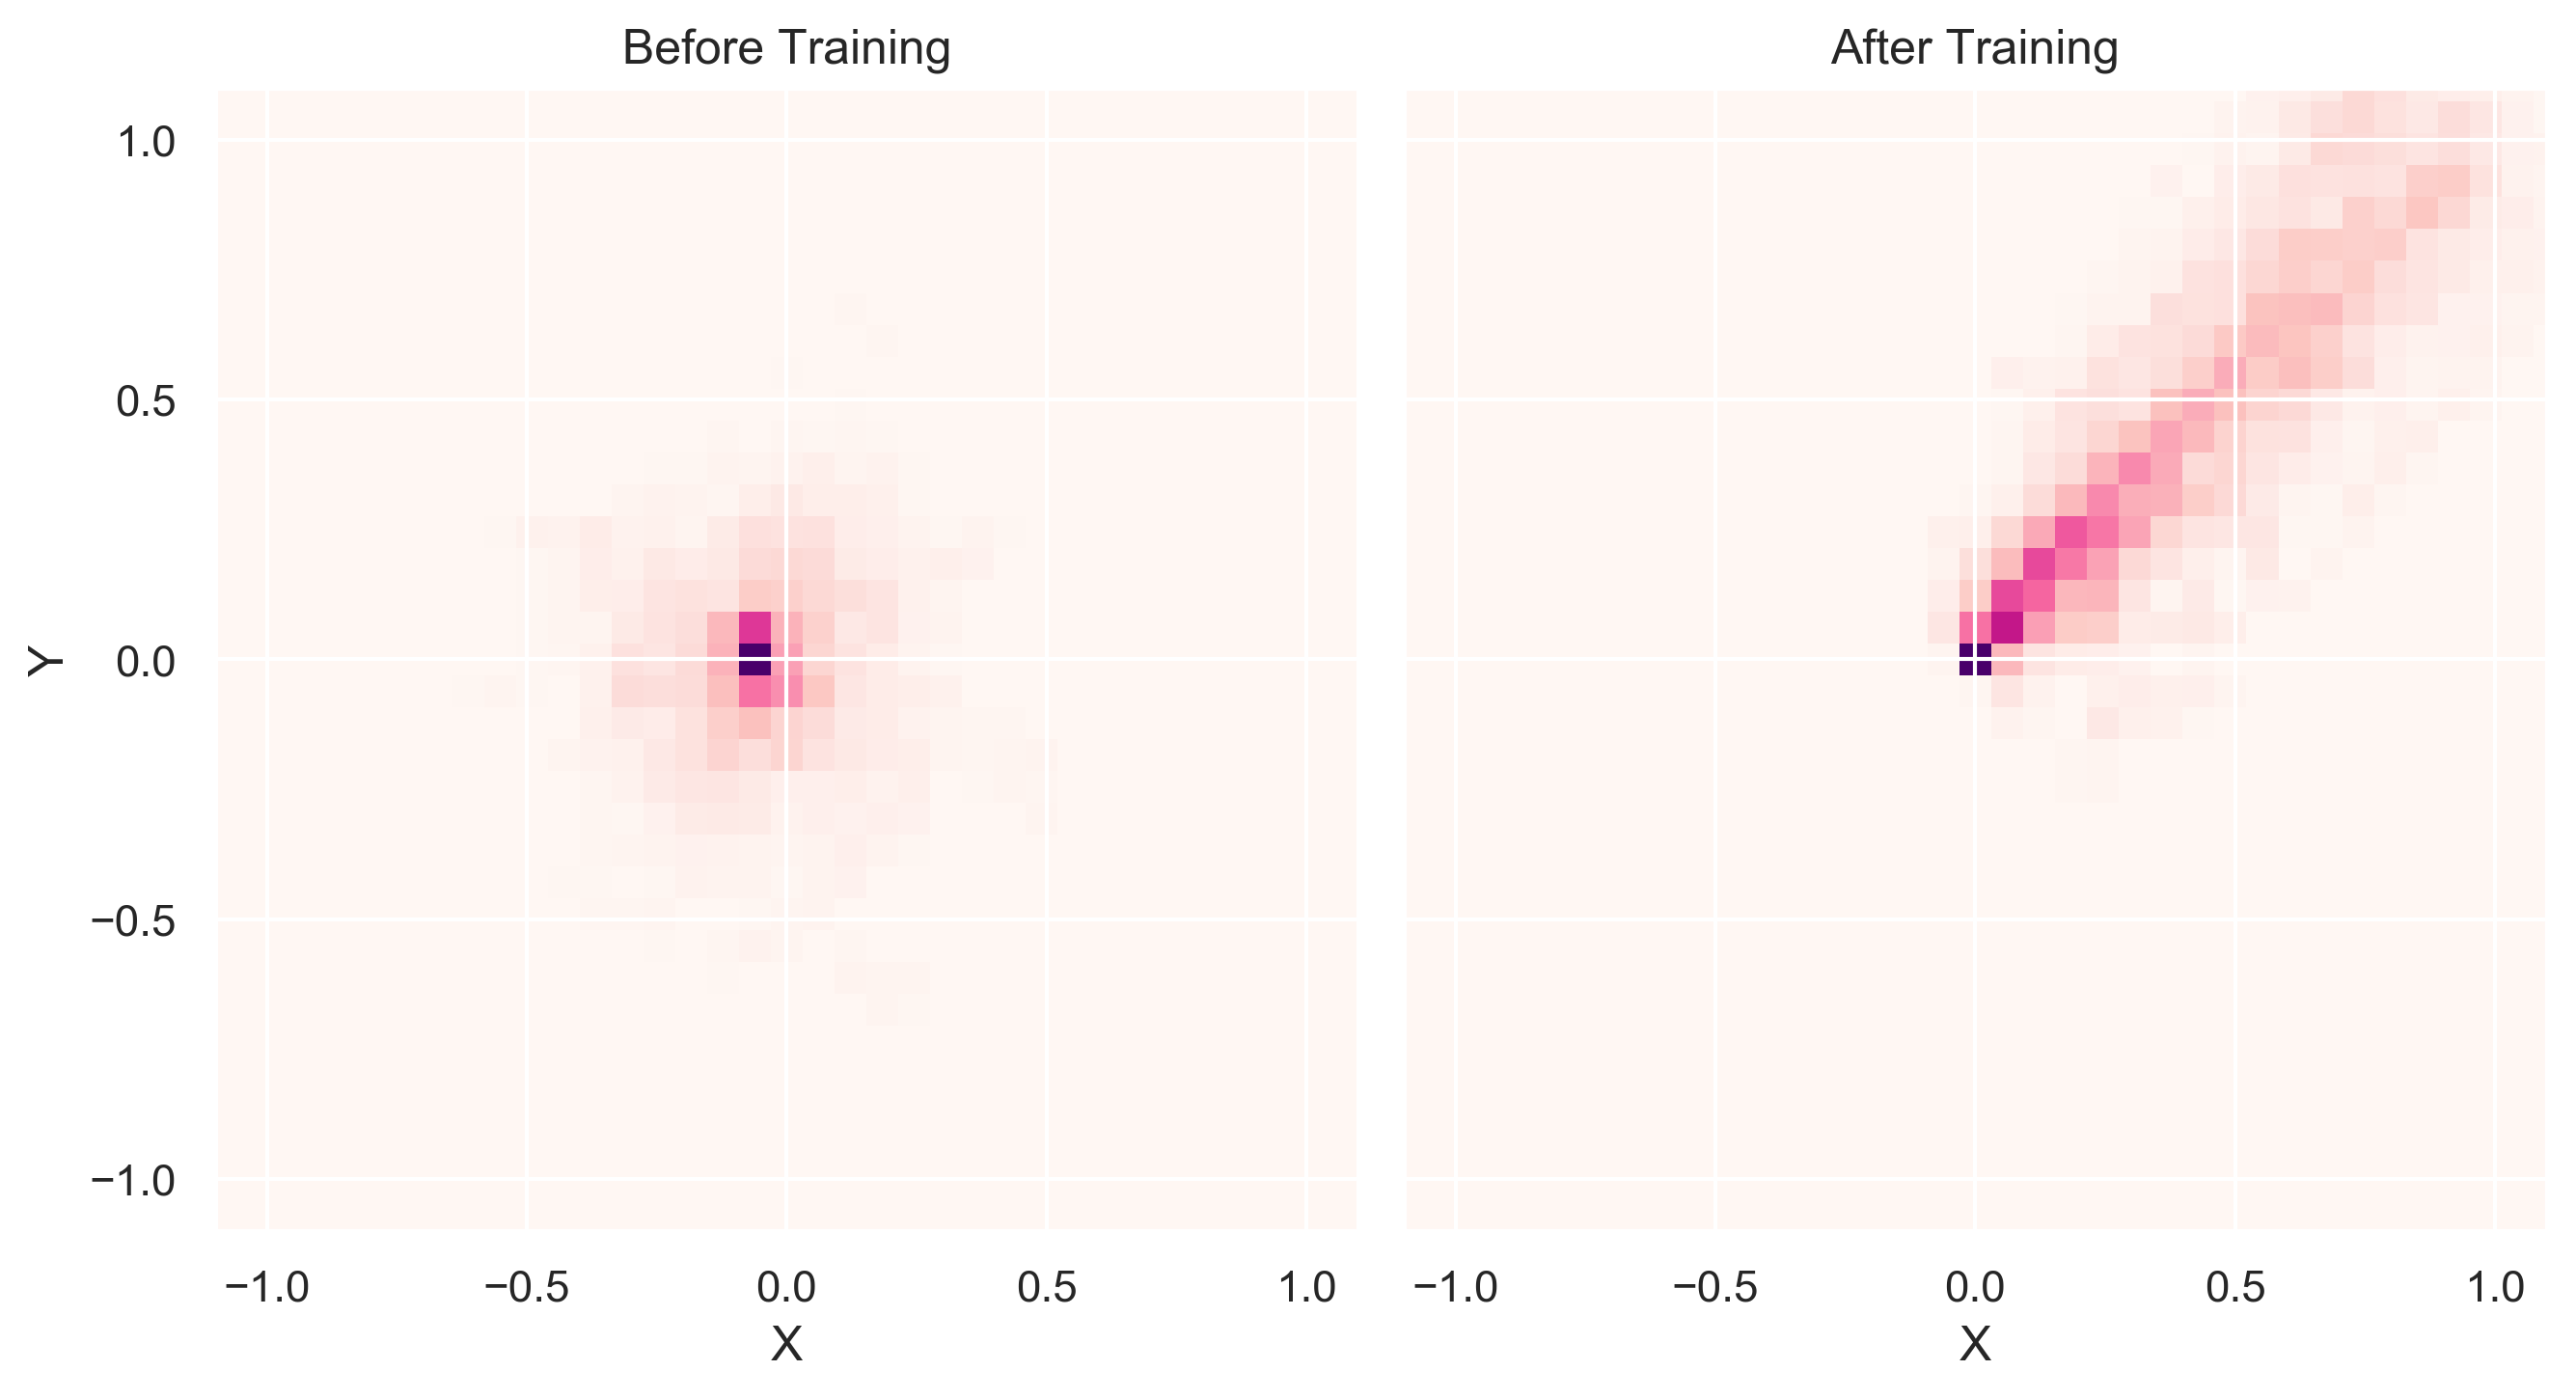

In [3]:

fig, axes = plt.subplots(
    1,#2,
    2,
    #sharex=True,
    sharey=True,
    figsize=(
        9,
        6, #9
    ),
    dpi=300,
    #gridspec_kw=dict(wspace=0)
)

#vel_bins = np.linspace(-.5, .5, 50)
pos_bins = np.linspace(-1.5, 1.5, 50)

# # Plot velocity space
# plt.sca(axes[0][0])
# plt.imshow(
#     np.histogram2d(
#         data_random[:, 7],
#         data_random[:, 8],
#         bins=vel_bins
#     )[0].T,
#     extent=(-1.5, 1.5, -1.5, 1.5),
#     origin='lower'
# )
# plt.title("Before Training")
# plt.xlabel("VX")
# plt.ylabel("VY")
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)
# plt.yticks([-1.0, -0.5, 0, 0.5, 1.0])

# plt.sca(axes[0][1])
# plt.title("After Training")
# plt.imshow(
#     np.histogram2d(
#         data_trained[:, 7],
#         data_trained[:, 8],
#         bins=vel_bins
#     )[0].T,
#     extent=(-1.5, 1.5, -1.5, 1.5),
#     origin='lower'
# )
# plt.xlabel("VX")
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)

# Plot position space
plt.sca(axes[0]) #plt.sca(axes[1][0])
plt.imshow(
    np.histogram2d(
        data_random[:, 0],
        data_random[:, 1],
        bins=pos_bins
    )[0].T,
    extent=(-1.5, 1.5, -1.5, 1.5),
    origin='lower'
)
plt.title("Before Training")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.yticks([-1.0, -0.5, 0, 0.5, 1.0])

plt.sca(axes[1]) #plt.sca(axes[1][1])
plt.imshow(
    np.histogram2d(
        data_trained[:, 0],
        data_trained[:, 1],
        bins=pos_bins
    )[0].T,
    extent=(-1.5, 1.5, -1.5, 1.5),
    origin='lower'
)
plt.title("After Training")
plt.xlabel("X")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

plt.tight_layout()
plt.savefig(
    os.path.join("manuscript", "figures", "fig-heatmap.pdf"),
    dpi=300,
    bbox_inches='tight',
    pad_inches=0,
)
plt.show()
plt.close()



Heatmap of Jitterbug position during 100 episodes before and after training on the task *Move In Direction*, where the direction is fixed at 45 degrees.
